In [2]:
import sklearn.datasets as datasets
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.datasets import load_sample_image #处理图片
from sklearn.metrics import pairwise_distances_argmin #处理距离
from sklearn.utils import shuffle #打乱颜色
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #绘制3D
%matplotlib inline

n_colors = 64
china = load_sample_image("china.jpg")
china

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

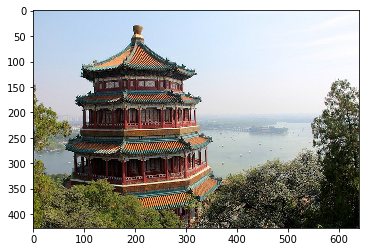

In [3]:
plt.imshow(china, cmap="gray")

In [4]:
china.shape

(427, 640, 3)

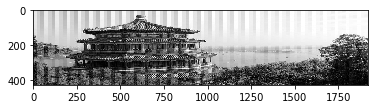

In [9]:
plt.imshow(china.reshape(427,640*3),cmap="gray")

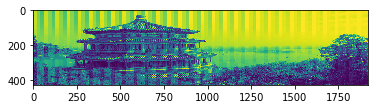

In [10]:
china = np.array(china, dtype=np.float)/255 #图片颜色转化为0-1之间，0-255之间
plt.imshow(china.reshape(427, 640*3))

In [11]:
w, h, d = china.shape
image_array = np.reshape(china, (w*h, d))
type(image_array)

numpy.ndarray

In [12]:
image_array.shape

(273280, 3)

In [13]:
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmn = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample) #训练
label = kmn.predict(image_array) #获取标签点
codebook_random = shuffle(image_array, random_state=0)[:n_colors] #生成随机label
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)

In [14]:
def recreate_image(codebook, labels, w, h): #生成图片，输入数组，颜色表，标题，宽带，高度
    d = codebook.shape[1] #调整形状
    image = np.zeros((w, h, d)) #创建一个图片。全部为0
    label_idx = 0
    for i in range(w): #批量填充 w,h
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

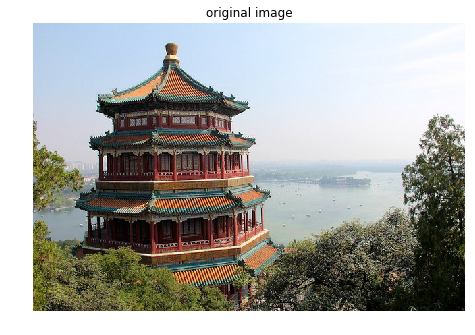

In [16]:
plt.figure(1)
plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis("off")
plt.title("original image")
plt.imshow(china)

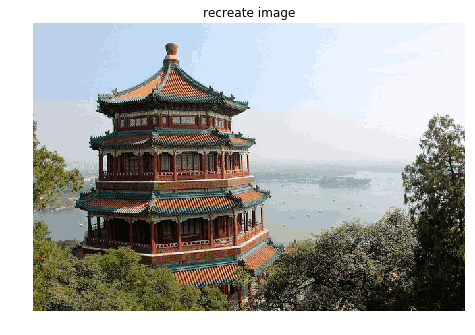

In [18]:
plt.figure(2)
plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis("off")
plt.title("recreate image")
plt.imshow(recreate_image(kmn.cluster_centers_, label, w, h))

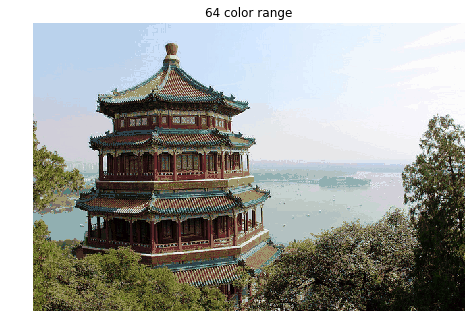

In [19]:
plt.figure(3)
plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis("off")
plt.title("64 color range")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))